In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv('Titanic.csv',index_col='PassengerId')

In [45]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [47]:
data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [48]:
data['Mod_Age'] = data['Age'].fillna(data['Age'].mean())

In [49]:
data[['Mod_Age','Age']]

,Mod_Age,Age
PassengerId,,
1,22.000000,22.0
2,38.000000,38.0
3,26.000000,26.0
4,35.000000,35.0
5,35.000000,35.0
...,...,...
887,27.000000,27.0
888,19.000000,19.0
889,29.699118,NaN


In [50]:
data = data.drop(columns=['Cabin'])

In [51]:
# data['Embarked'] = data['Embarked'].dropna()

In [53]:
data[data['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,38.0
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,62.0


In [54]:
data = data.drop(index = data[data['Embarked'].isnull()].index)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       712 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
 10  Mod_Age   889 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 83.3+ KB


In [58]:
data.duplicated().sum()

0

In [61]:
data['Sex'].value_counts()/data.shape[0]

Sex
male      0.649044
female    0.350956
Name: count, dtype: float64

In [64]:
data_men = data[data['Sex'] == 'male']
data_female = data[data['Sex'] == 'female']

In [65]:
data_men['Survived'].value_counts()/data_men.shape[0]

Survived
0    0.811092
1    0.188908
Name: count, dtype: float64

In [66]:
data_female['Survived'].value_counts()/data_female.shape[0]

Survived
1    0.740385
0    0.259615
Name: count, dtype: float64

<Axes: xlabel='Sex', ylabel='count'>

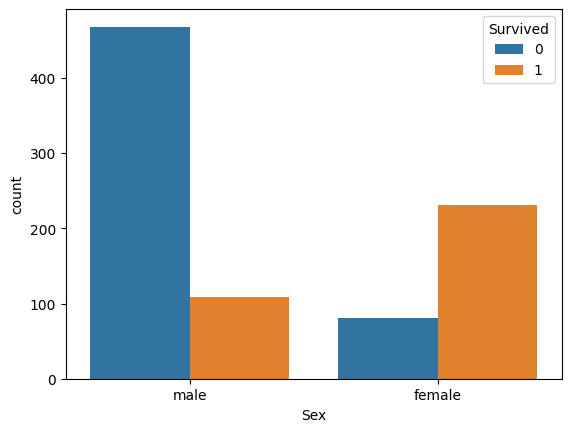

In [63]:
sns.countplot(data,x='Sex',hue='Survived')

<Axes: xlabel='Survived', ylabel='count'>

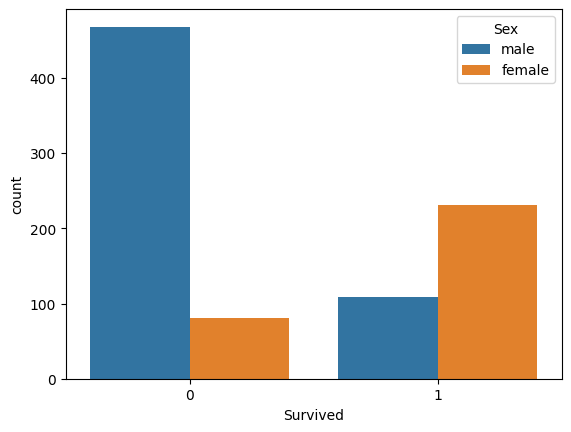

In [68]:
sns.countplot(data,x='Survived',hue='Sex')

<Axes: xlabel='Age', ylabel='Count'>

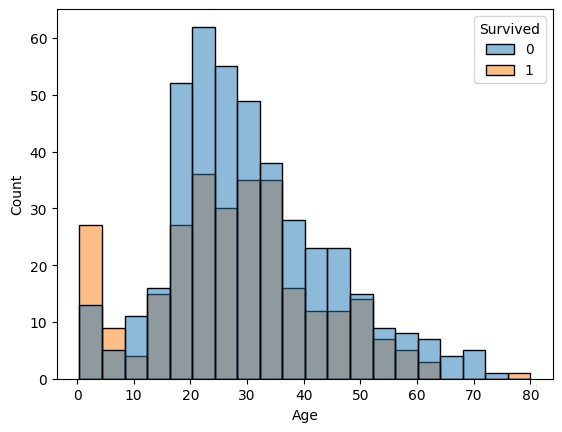

In [70]:
sns.histplot(data,x = 'Age',hue='Survived')

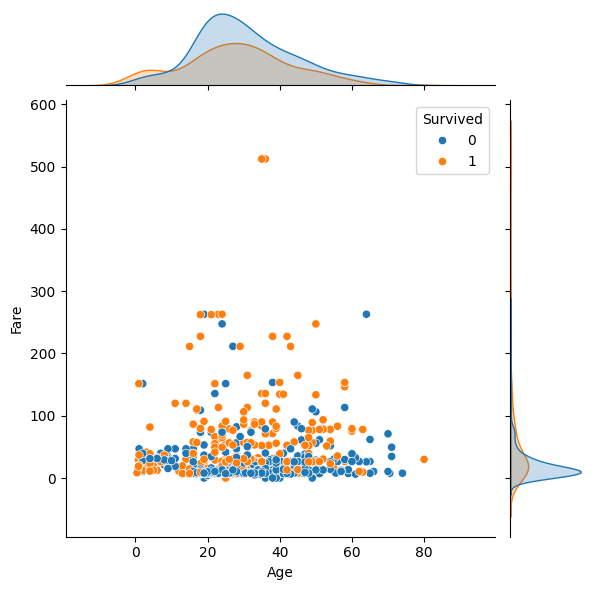

In [71]:
sns.jointplot(data,x = 'Age',y = 'Fare',hue = 'Survived',kind = 'scatter')

<Axes: xlabel='Fare', ylabel='Count'>

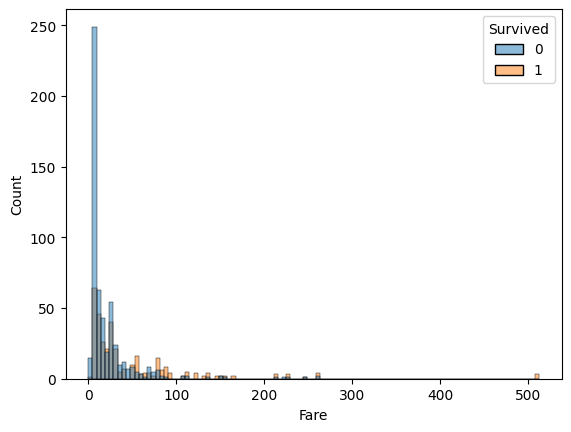

In [10]:
sns.histplot(data,x = 'Fare',hue='Survived')

<Axes: xlabel='Pclass', ylabel='count'>

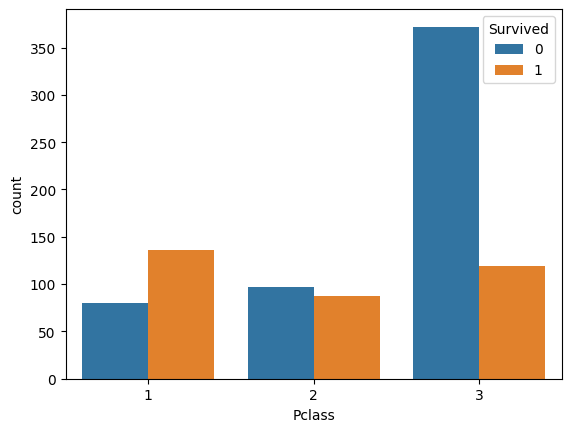

In [11]:
sns.countplot(data,x = 'Pclass',hue='Survived')

<Axes: xlabel='Embarked', ylabel='count'>

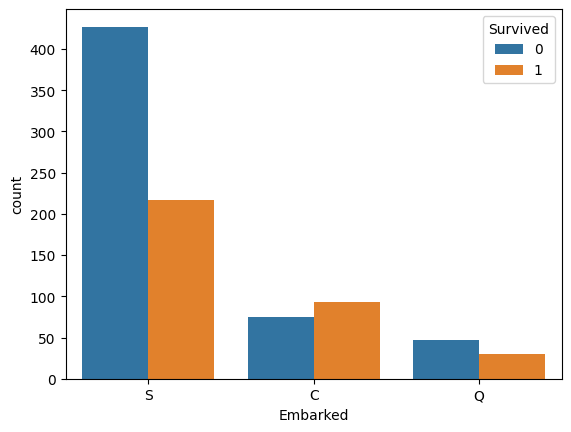

In [12]:
sns.countplot(data,x = 'Embarked',hue='Survived')

<Axes: xlabel='Survived', ylabel='Age'>

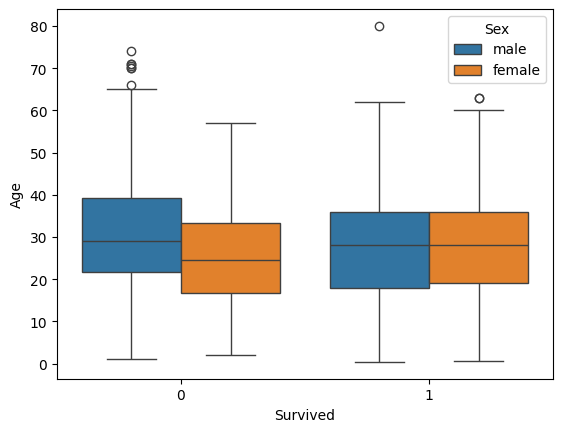

In [73]:
sns.boxplot(data,x='Survived',y='Age',hue='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

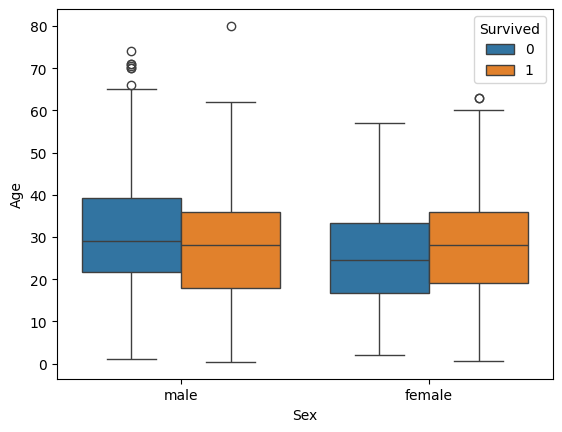

In [74]:
sns.boxplot(data,x='Sex',y='Age',hue='Survived')

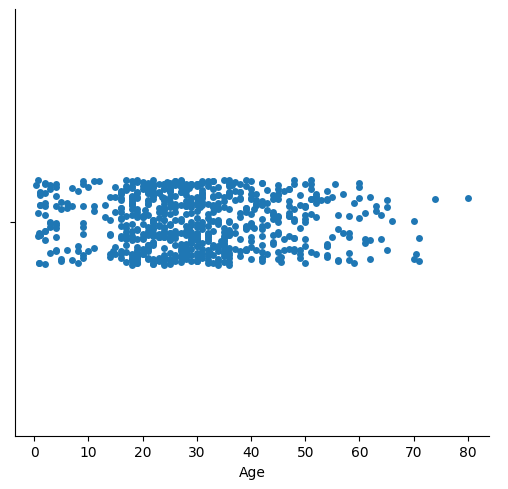

In [76]:
sns.catplot(data,x = 'Age')

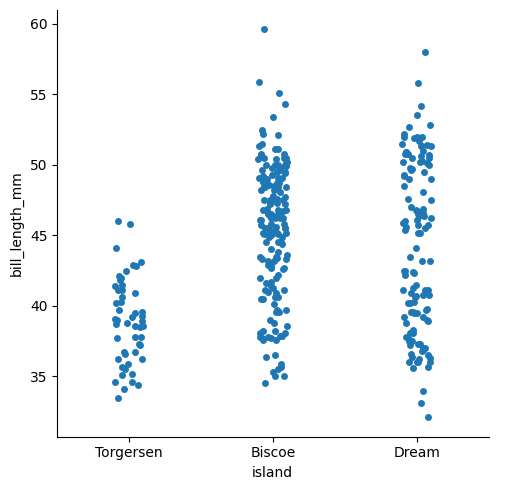

In [77]:
df = sns.load_dataset('penguins')
sns.catplot(data=df, x='island', y='bill_length_mm',)
plt.show()

In [79]:
pd.crosstab(data['Embarked'], data['Pclass'], values=data['Survived'], aggfunc='mean')

Pclass,1,2,3
Embarked,,,
C,0.694118,0.529412,0.378788
Q,0.500000,0.666667,0.375000
S,0.582677,0.463415,0.189802


In [82]:
def alone(row):
    return row['SibSp']+row['Parch'] == 0

# data['Alone'] = data.apply(alone,axis = 1)
# data['Alone'] = data.apply(lambda row: row['SibSp']+row['Parch'] == 0,axis = 1)
data['Alone'] = data['SibSp'] + data['Parch'] == 0
data


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Mod_Age,Alone
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,22.000000,False
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,38.000000,False
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,26.000000,True
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,35.000000,False
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,35.000000,True
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,27.000000,True
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,19.000000,True
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,29.699118,False


<Axes: xlabel='Alone', ylabel='count'>

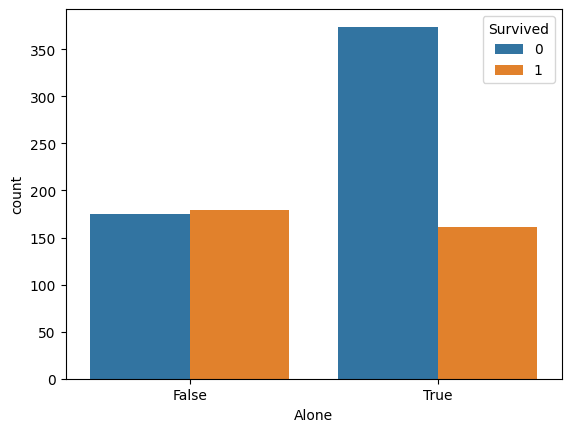

In [84]:
sns.countplot(data,x='Alone',hue='Survived')

<Axes: xlabel='Alone', ylabel='Survived'>

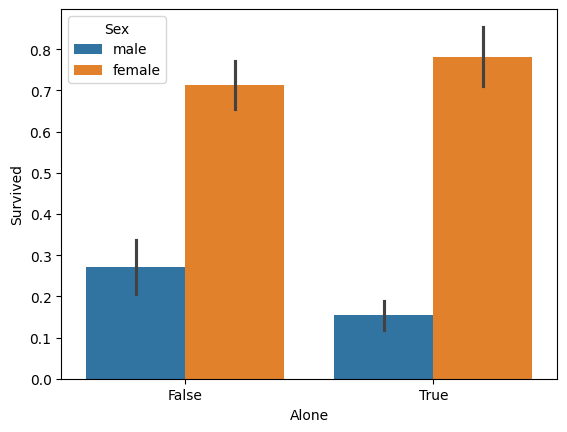

In [86]:
sns.barplot(data,x='Alone',y='Survived',hue='Sex')

<Axes: xlabel='Sex', ylabel='Survived'>

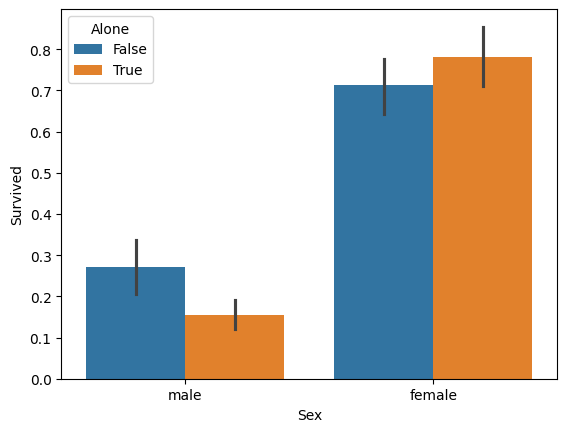

In [88]:
sns.barplot(data,hue='Alone',y='Survived',x='Sex')